In [ ]:
import requests
import re
import urllib.request
from bs4 import BeautifulSoup
from collections import deque
from html.parser import HTMLParser
from urllib.parse import urlparse
import os
from urllib.request import Request, urlopen

# Regex pattern to match a URL
HTTP_URL_PATTERN = r'^http[s]*://.+'

# Define root domain to crawl
domain = "www.universalmusic.com/"
full_url = "https://www.universalmusic.com/"

# Create a class to parse the HTML and get the hyperlinks
class HyperlinkParser(HTMLParser):
    def __init__(self):
        super().__init__()
        # Create a list to store the hyperlinks
        self.hyperlinks = []

    # Override the HTMLParser's handle_starttag method to get the hyperlinks
    def handle_starttag(self, tag, attrs):
        attrs = dict(attrs)

        # If the tag is an anchor tag and it has an href attribute, add the href attribute to the list of hyperlinks
        if tag == "a" and "href" in attrs:
            self.hyperlinks.append(attrs["href"])

# Function to get the hyperlinks from a URL
def get_hyperlinks(url):

    # Try to open the URL and read the HTML
    try:
        # Open the URL and read the HTML
        # with urllib.request.urlopen(url) as response:
        with urlopen(Request(url, headers={'User-Agent': 'Mozilla/5.0'})) as response:

            # If the response is not HTML, return an empty list
            if not response.info().get('Content-Type').startswith("text/html"):
                return []

            # Decode the HTML
            html = response.read().decode('utf-8')
    except Exception as e:
        print(e)
        return []

    # Create the HTML Parser and then Parse the HTML to get hyperlinks
    parser = HyperlinkParser()
    parser.feed(html)

    return parser.hyperlinks

# Function to get the hyperlinks from a URL that are within the same domain
def get_domain_hyperlinks(local_domain, url):
    clean_links = []
    for link in set(get_hyperlinks(url)):
        clean_link = None

        # If the link is a URL, check if it is within the same domain
        if re.search(HTTP_URL_PATTERN, link):
            # Parse the URL and check if the domain is the same
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain:
                clean_link = link

        # If the link is not a URL, check if it is a relative link
        else:
            if link.startswith("/"):
                link = link[1:]
            elif link.startswith("#") or link.startswith("mailto:"):
                continue
            clean_link = "https://" + local_domain + "/" + link

        if clean_link is not None:
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            clean_links.append(clean_link)

    # Return the list of hyperlinks that are within the same domain
    return list(set(clean_links))


def crawl(url):
    # Parse the URL and get the domain
    local_domain = urlparse(url).netloc

    # Create a queue to store the URLs to crawl
    queue = deque([url])

    # Create a set to store the URLs that have already been seen (no duplicates)
    seen = set([url])

    # Create a directory to store the text files
    if not os.path.exists("text/"):
            os.mkdir("text/")

    if not os.path.exists("text/"+local_domain+"/"):
            os.mkdir("text/" + local_domain + "/")

    # Create a directory to store the csv files
    if not os.path.exists("processed"):
            os.mkdir("processed")

    # While the queue is not empty, continue crawling
    while queue:

        # Get the next URL from the queue
        url = queue.pop()
        print(url) # for debugging and to see the progress

        # Save text from the url to a <url>.txt file
        with open('text/'+local_domain+'/'+url[8:].replace("/", "_") + ".txt", "w") as f:

            # Get the text from the URL using BeautifulSoup
            soup = BeautifulSoup(requests.get(url).text, "html.parser")

            # Get the text but remove the tags
            text = soup.get_text()

            # If the crawler gets to a page that requires JavaScript, it will stop the crawl
            if ("You need to enable JavaScript to run this app." in text):
                print("Unable to parse page " + url + " due to JavaScript being required")

            # Otherwise, write the text to the file in the text directory
            f.write(text)

        # Get the hyperlinks from the URL and add them to the queue
        for link in get_domain_hyperlinks(local_domain, url):
            if link not in seen:
                queue.append(link)
                seen.add(link)

crawl(full_url)

https://www.universalmusic.com/
https://www.universalmusic.com/digital-innovation
https://www.universalmusic.com/executives/michael-nash
https://www.universalmusic.com/company/#leadership
https://www.universalmusic.com/company/page/2/#news-tab
https://www.universalmusic.com/universal-music-publishing-group-celebrates-no-1-music-publisher-ranking-for-third-consecutive-quarter
https://www.universalmusic.com/news
https://www.universalmusic.com/wp-content/uploads/2023/03/Screen-Shot-2023-03-21-at-9.23.36-AM.png
https://www.universalmusic.com/universal-music-group-and-deezer-announce-initiative-to-explore-new-artist-and-fan-focused-streaming-approach
http://www.universalmusic.com
https://www.universalmusic.com/wp-content/uploads/2022/10/UMG_LineworkLogo-4.png
https://www.universalmusic.com/wp-content/uploads/2023/03/deezer.jpg
https://www.universalmusic.com/universal-music-group-announces-acquisition-of-legendary-classical-label-hyperion-records
https://www.universalmusic.com/tag/decca-clas

In [ ]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie

In [ ]:
# from urllib.request import Request, urlopen
# url="https://www.mastercard.us/en-us/business/large-enterprise.html"
# req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})

# web_byte = urlopen(req).read()

# webpage = web_byte.decode('utf-8')
# webpage

'\n<!DOCTYPE HTML>\n\n<html lang="en-US">\n<head>\n    \n        <!-- Dynamic Yield Integration with US data center -->\n\n        <!-- DNS Prefetch and Preconnect -->\n        <link rel="preconnect" href="//cdn.dynamicyield.com"/>\n        <link rel="preconnect" href="//st.dynamicyield.com"/>\n        <link rel="preconnect" href="//rcom.dynamicyield.com"/>\n        <link rel="dns-prefetch" href="//cdn.dynamicyield.com"/>\n        <link rel="dns-prefetch" href="//st.dynamicyield.com"/>\n        <link rel="dns-prefetch" href="//rcom.dynamicyield.com"/>\n\n        <!-- DY Context -->\n        <script>\n            window.DY = window.DY || {};\n            DY.recommendationContext = { type: "OTHER" };\n        </script>\n\n        <!-- DY Scripts -->\n        <script src="//cdn.dynamicyield.com/api/8781244/api_dynamic.js"></script>\n        <script src="//cdn.dynamicyield.com/api/8781244/api_static.js"></script>\n\n    \n\n    \n\n    \n        <!-- DY Script for Active Cookie Consent and

In [ ]:
import pandas as pd
import csv

# Create a list to store the text files
texts=[]

domain = "www.universalmusic.com/"
# Get all the text files in the text directory
for file in os.listdir("text/" + domain + "/"):

    # Open the file and read the text
    with open("text/" + domain + "/" + file, "r") as f:
        text = f.read()

        # Omit the first 11 lines and the last 4 lines, then replace -, _, and #update with spaces.
        texts.append((file[11:-4].replace('-',' ').replace('_', ' ').replace('#update',''), text))

# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = df.fname + ". " + remove_newlines(df.text)
df.to_csv('umg_web.csv',quoting=csv.QUOTE_NONE, escapechar='\\')
df.head(10)


<ipython-input-2-429202555403>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


,fname,text
0,almusic.com wp content uploads 2023 04 Q123 2.png,almusic.com wp content uploads 2023 04 Q123 2....
1,almusic.com leading electronic festival brand ...,almusic.com leading electronic festival brand ...
2,almusic.com wp content uploads 2021 09 MR Logo...,almusic.com wp content uploads 2021 09 MR Logo...
3,almusic.com umgs task force for meaningful change,almusic.com umgs task force for meaningful cha...
4,almusic.com wp content uploads 2021 12 UMG NV ...,almusic.com wp content uploads 2021 12 UMG NV ...
5,almusic.com elton john presents beyond the yel...,almusic.com elton john presents beyond the yel...
6,almusic.com label republic records #xo records,almusic.com label republic records #xo records...
7,almusic.com conde nast and universal music gro...,almusic.com conde nast and universal music gro...
8,almusic.com hybe and universal music group ann...,almusic.com hybe and universal music group ann...
9,almusic.com visual artist melody you and 1022p...,almusic.com visual artist melody you and 1022p...


In [ ]:
df.shape

(435, 2)

In [ ]:
# df2.to_csv('mastercard_web_processed.csv')
df.head()

,fname,text
0,almusic.com wp content uploads 2023 04 Q123 2.png,almusic.com wp content uploads 2023 04 Q123 2....
1,almusic.com leading electronic festival brand ...,almusic.com leading electronic festival brand ...
2,almusic.com wp content uploads 2021 09 MR Logo...,almusic.com wp content uploads 2021 09 MR Logo...
3,almusic.com umgs task force for meaningful change,almusic.com umgs task force for meaningful cha...
4,almusic.com wp content uploads 2021 12 UMG NV ...,almusic.com wp content uploads 2021 12 UMG NV ...


In [ ]:
pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.9 MB/s eta 0:00:00


,title,text
0,almusic.com wp content uploads 2023 04 Q123 2.png,almusic.com wp content uploads 2023 04 Q123 2....
1,almusic.com leading electronic festival brand ...,almusic.com leading electronic festival brand ...
2,almusic.com wp content uploads 2021 09 MR Logo...,almusic.com wp content uploads 2021 09 MR Logo...
3,almusic.com umgs task force for meaningful change,almusic.com umgs task force for meaningful cha...
4,almusic.com wp content uploads 2021 12 UMG NV ...,almusic.com wp content uploads 2021 12 UMG NV ...
5,almusic.com elton john presents beyond the yel...,almusic.com elton john presents beyond the yel...
6,almusic.com label republic records #xo records,almusic.com label republic records #xo records...
7,almusic.com conde nast and universal music gro...,almusic.com conde nast and universal music gro...
8,almusic.com hybe and universal music group ann...,almusic.com hybe and universal music group ann...
9,almusic.com visual artist melody you and 1022p...,almusic.com visual artist melody you and 1022p...


<Axes: >

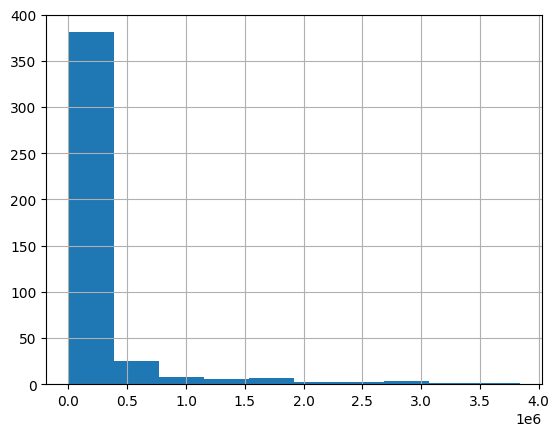

In [ ]:
import tiktoken

# Load the cl100k_base tokenizer which is designed to work with the ada-002 model
tokenizer = tiktoken.get_encoding("cl100k_base")

# df = pd.read_csv('umg_web.csv', on_bad_lines = 'skip')

df.columns = ['title', 'text']
display(df.head(10))

# Tokenize the text and save the number of tokens to a new column
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()

# Tokenize Words

In [ ]:
max_tokens = 500

# Function to split the text into chunks of a maximum number of tokens
def split_into_many(text, max_tokens = max_tokens):

    # Split the text into sentences
    sentences = text.split('. ')

    # Get the number of tokens for each sentence
    n_tokens = [len(tokenizer.encode(" " + sentence)) for sentence in sentences]

    chunks = []
    tokens_so_far = 0
    chunk = []

    # Loop through the sentences and tokens joined together in a tuple
    for sentence, token in zip(sentences, n_tokens):

        # If the number of tokens so far plus the number of tokens in the current sentence is greater
        # than the max number of tokens, then add the chunk to the list of chunks and reset
        # the chunk and tokens so far
        if tokens_so_far + token > max_tokens:
            chunks.append(". ".join(chunk) + ".")
            chunk = []
            tokens_so_far = 0

        # If the number of tokens in the current sentence is greater than the max number of
        # tokens, go to the next sentence
        if token > max_tokens:
            continue

        # Otherwise, add the sentence to the chunk and add the number of tokens to the total
        chunk.append(sentence)
        tokens_so_far += token + 1

    return chunks


shortened = []

# Loop through the dataframe
for row in df.iterrows():

    # If the text is None, go to the next row
    if row[1]['text'] is None:
        continue

    # If the number of tokens is greater than the max number of tokens, split the text into chunks
    if row[1]['n_tokens'] > max_tokens:
        shortened += split_into_many(row[1]['text'])

    # Otherwise, add the text to the list of shortened texts
    else:
        shortened.append( row[1]['text'] )

<Axes: >

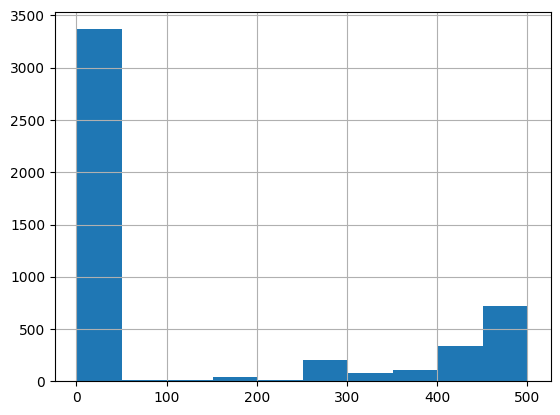

In [ ]:
df = pd.DataFrame(shortened, columns = ['text'])
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))
df.n_tokens.hist()

In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
import openai, os
os.environ['OPENAI_API_KEY'] = 'XXX'
openai.api_key =  'XXX'

In [ ]:
# df2 = df[:100000]
df2['embeddings'] = df2.text.apply(lambda x: openai.Embedding.create(input=x, engine='text-embedding-ada-002')['data'][0]['embedding'])
# df.to_csv('processed/embeddings.csv')
df2.head()

,text,n_tokens,embeddings,distances
0,almusic.com wp content uploads 2023 04 Q123 2....,17,"[0.0020853730384260416, -0.0028811744414269924...",NaN
-0.00425187],0.22803700895771228,NaN,"[0.03061133809387684, 0.00564675172790885, 0.0...",NaN
1,.,1,"[-0.008785099722445011, -0.016915082931518555,...",NaN
-0.00864752],0.2488464624623309,NaN,"[0.02020806074142456, 0.0013746180338785052, 0...",NaN
2,.,1,"[-0.008785099722445011, -0.016915082931518555,...",NaN


In [ ]:
import pandas as pd
import numpy as np
from openai.embeddings_utils import distances_from_embeddings, cosine_similarity

# df=pd.read_csv('processed/embeddings.csv', index_col=0)
df2['embeddings'] = df2['embeddings'].apply(np.array)
# df2.to_csv('umg_web_processed.csv',quoting=csv.QUOTE_NONE, escapechar='\\')

df2.head()

,text,n_tokens,embeddings,distances
0,almusic.com wp content uploads 2023 04 Q123 2....,17,"[0.0020853730384260416, -0.0028811744414269924...",0.227650
-0.00425187],0.22803700895771228,NaN,"[0.03061133809387684, 0.00564675172790885, 0.0...",0.301135
1,.,1,"[-0.008785099722445011, -0.016915082931518555,...",0.248846
-0.00864752],0.2488464624623309,NaN,"[0.02020806074142456, 0.0013746180338785052, 0...",0.293781
2,.,1,"[-0.008785099722445011, -0.016915082931518555,...",0.248846


In [ ]:
import pandas as pd
import csv
import openai, os

df2 = pd.read_csv('umg_web_processed.csv', on_bad_lines = 'skip',index_col = 0)
df2.head()

,text,n_tokens,embeddings,distances
0,almusic.com wp content uploads 2023 04 Q123 2....,17,[ 0.00198511 -0.00291489 0.00849016 ... -0.00...,NaN
-0.00425187],0.22803700895771228,NaN,NaN,NaN
1,.,1,[-0.0087851 -0.01691508 0.00506077 ... 0.00...,NaN
-0.00864752],0.2488464624623309,NaN,NaN,NaN
2,.,1,[-0.0087851 -0.01691508 0.00506077 ... 0.00...,NaN


In [ ]:
import warnings
warnings.filterwarnings("ignore")
def create_context(
    question, df, max_len=1800, size="ada"
):
    """
    Create a context for a question by finding the most similar context from the dataframe
    """

    # Get the embeddings for the question
    q_embeddings = openai.Embedding.create(input=question, engine='text-embedding-ada-002')['data'][0]['embedding']

    # Get the distances from the embeddings
    df['distances'] = distances_from_embeddings(q_embeddings, df['embeddings'].values, distance_metric='cosine')


    returns = []
    cur_len = 0

    # Sort by distance and add the text to the context until the context is too long
    for i, row in df.sort_values('distances', ascending=True).iterrows():

        # Add the length of the text to the current length
        cur_len += row['n_tokens'] + 4

        # If the context is too long, break
        if cur_len > max_len:
            break

        # Else add it to the text that is being returned
        returns.append(row["text"])

    # Return the context
    return "\n\n###\n\n".join(returns)

def answer_question(
    df,
    model="text-davinci-003",
    question="Am I allowed to publish model outputs to Twitter, without a human review?",
    max_len=1800,
    size="ada",
    debug=False,
    max_tokens=150,
    stop_sequence=None
):
    """
    Answer a question based on the most similar context from the dataframe texts
    """
    context = create_context(
        question,
        df,
        max_len=max_len,
        size=size,
    )
    # If debug, print the raw model response
    if debug:
        print("Context:\n" + context)
        print("\n\n")

    try:
        # Create a completions using the question and context
        response = openai.Completion.create(
            prompt=f"Answer the question based on the context below, and if the question can't be answered based on the context, say \"I don't know\"\n\nContext: {context}\n\n---\n\nQuestion: {question}\nAnswer:",
            temperature=0,
            max_tokens=max_tokens,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0,
            stop=stop_sequence,
            model=model,
        )
        return response["choices"][0]["text"].strip()
    except Exception as e:
        print(e)
        return ""

# QA Bot

In [ ]:
answer_question(df2, question = "What does Universal Music Group digital innovations offer?", debug = False)

'Universal Music Group digital innovations offers initiatives such as the UMG Accelerator Engagement Network, Capitol360 Innovation Center, their in-house incubator Abbey Road RED, Digital Innovation Licenses, hackathons, panel discussions, and educational programming on the business of music.'

In [ ]:
answer_question(df2, question = "Can you summarize the article 'ENDEL AND UNIVERSAL MUSIC GROUP TO CREATE AI-POWERED, ARTIST-DRIVEN FUNCTIONAL MUSIC'?", debug = False)

"Endel and Universal Music Group have partnered to use Endel's AI technology to create soundscapes designed to enhance listeners' wellness, including both new music and new versions of catalog music. The soundscapes are designed to enhance sleep, focus, and other daily activities, and are crafted with artist-provided stems to create soundscapes driven by scientific insights into how music affects our mind-state. The partnership aims to create new opportunities to generate additional revenue for catalogs, while expanding and enhancing work into new areas and moments in fans' lives, while aspiring to support wellness for the listener."

In [ ]:
answer_question(df2, question = "What LABELS & BRANDS do Universal Music Group own '? ", debug = False)

'Universal Music Group owns Abbey Road Studios, Bravado, Capitol Music Group, Decca Records, Def Jam Recordings, Deutsche Grammophon, EMI, Interscope Geffen A&M, Island Records, Polydor, Republic Records, Universal Music Enterprises, Universal Music Group Nashville, Universal Music Latin Entertainment, Universal Music Publishing Group, Verve Label Group, and Virgin Music Group.'

In [ ]:
answer_question(df2, question = "What latest technology news does Capitol360 Innovation Center offer? ", debug = False)

'Capitol360 Innovation Center provides space and conducts event programming designed to foster innovative ideas, bridge the gap between content creators and the tech community, and foster the next generation of leaders in music.'

In [ ]:
answer_question(df2, question = "What licensing does Universal Music Group provide?", debug = False)

'Universal Music Group provides licensing for master recordings of their artists, rights to use a song or lyrics from a song that is administered or published by Universal Music Publishing Group, and production music library operations.'